# Worksheet 1 — Answers

## 1) Create matrix M

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from pathlib import Path

# Create matrix M with the given values
M = np.array([[ 2,  4,  6,  8],
              [10, 20, 30, 40],
              [ 5, 10, 15, 20]], dtype=int)
print('M =\n', M)

M =
 [[ 2  4  6  8]
 [10 20 30 40]
 [ 5 10 15 20]]


## 2) Get the 2nd row of M using the colon operator :

In [10]:
# In Python/NumPy, rows/columns are 0-indexed. '2nd row' means index 1.
row2 = M[1, :]   # row index 1, all columns
print('Second row:', row2)

Second row: [10 20 30 40]


## 3) Get the 4th column of M using the colon operator :

In [12]:
# 4th column has index 3 (0-based indexing)
col4 = M[:, 3]   # all rows, column index 3
print('Fourth column:', col4)

Fourth column: [ 8 40 20]


## 4) Assign all elements of M greater than 9 the value 0

In [13]:
M_mod = M.copy()
M_mod[M_mod > 9] = 0
print('M with elements > 9 set to 0:\n', M_mod)

M with elements > 9 set to 0:
 [[2 4 6 8]
 [0 0 0 0]
 [5 0 0 0]]


In [14]:
# Sir Version
shape = M.shape
print('Shape of M:', shape)
for x in range(0,shape[0]):
    for y in range(0,shape[1]):
        if M[x,y]>9:
            M[x,y]=0

print('Modified M:\n', M)

Shape of M: (3, 4)
Modified M:
 [[2 4 6 8]
 [0 0 0 0]
 [5 0 0 0]]


## 5) Create matrix M2 of random integers (0–255) with the size of M and display it as a grayscale image

M2 shape: (3, 4) | dtype: uint8


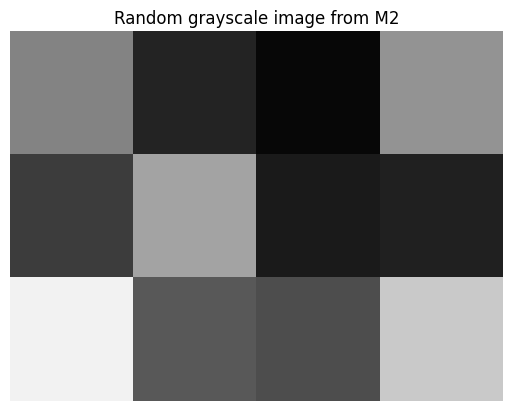

In [15]:
# M has shape (3, 4); we generate uint8 values in [0, 255].
M2 = np.random.randint(0, 256, size=M.shape, dtype=np.uint8)
print('M2 shape:', M2.shape, '| dtype:', M2.dtype)
plt.figure()
plt.imshow(M2, cmap='gray', vmin=0, vmax=255)
plt.title('Random grayscale image from M2')
plt.axis('off')
plt.show()

## 6) Create an RGB image M3 of size 100 by 200 pixels. Colour the left half orange and the right half blue, as follows. Display the image and also save it.
Left half **orange**, right half **blue**; display and save it.
- Orange RGB = (255, 165, 0)
- Blue RGB   = (0, 0, 255)

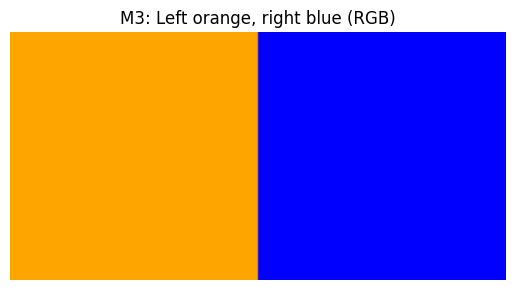

Saved: C:\GitHub\MCAST\IPCV\IPCV\M3_orange_blue.png


In [16]:
H, W = 100, 200
M3 = np.zeros((H, W, 3), dtype=np.uint8)

# Define colors
orange = np.array([255, 165,   0], dtype=np.uint8)
blue   = np.array([  0,   0, 255], dtype=np.uint8)

# Left half (columns 0..99) -> orange; Right half (columns 100..199) -> blue
mid = W // 2
M3[:, :mid, :] = orange
M3[:, mid:, :] = blue

# Display
plt.figure()
plt.imshow(M3)
plt.title('M3: Left orange, right blue (RGB)')
plt.axis('off')
plt.show()

# Save
m3_path = Path('.')/ 'M3_orange_blue.png'
Image.fromarray(M3).save(m3_path)
print('Saved:', m3_path.resolve())

## 7) Create M4 as an **RGBA** image
"
Copy from Q6, add a 4th channel **alpha** (transparency). Experiment with transparency levels.

**Note:** In 8-bit RGBA, alpha 0 means **fully transparent** (invisible), while alpha 255 means **fully opaque** (no transparency).

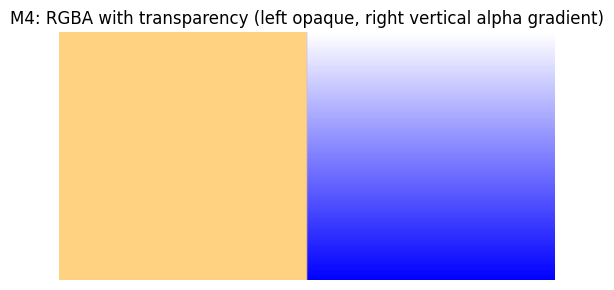

Saved: C:\GitHub\MCAST\IPCV\IPCV\M4_orange_blue_rgba.png
Alpha (left half) unique: [125]
Alpha (right half) range: 0 to 255


C:\Users\Steve\AppData\Local\Temp\ipykernel_4564\1385864187.py:32: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  Image.fromarray(M4, mode='RGBA').save(m4_path)


In [17]:
# Start from the same colors/size as M3 and add an alpha channel.
H, W = 100, 200
M4 = np.zeros((H, W, 4), dtype=np.uint8)  # RGBA

orange = np.array([255, 165,   0], dtype=np.uint8)
blue   = np.array([  0,   0, 255], dtype=np.uint8)

mid = W // 2

# Base RGB
M4[:, :mid, :3] = orange
M4[:,  mid:, :3] = blue

# Alpha channel experiments:
# - Left half mostly opaque (alpha=220)
# - Right half a horizontal gradient from fully transparent (0) at the top to opaque (255) at the bottom
M4[:, :mid, 3] = 125

# Create vertical gradient for the right half
alpha_grad = np.linspace(0, 255, H, dtype=np.uint8).reshape(H, 1)
M4[:, mid:, 3] = alpha_grad

# Display (matplotlib respects RGBA)
plt.figure()
plt.imshow(M4)  # Will show transparency over the notebook background
plt.title('M4: RGBA with transparency (left opaque, right vertical alpha gradient)')
plt.axis('off')
plt.show()

# Save
m4_path = Path('.') / 'M4_orange_blue_rgba.png'
Image.fromarray(M4, mode='RGBA').save(m4_path)
print('Saved:', m4_path.resolve())

# Show a few sample alpha values for verification
print('Alpha (left half) unique:', np.unique(M4[:, :mid, 3]))
print('Alpha (right half) range:', M4[:, mid:, 3].min(), 'to', M4[:, mid:, 3].max())

### Transparency notes
- **Alpha = 0** → fully transparent (pixel is invisible).
- **Alpha = 255** (or 1.0 in normalized float) → fully opaque.
- Values in between produce partial transparency (semi‑transparent overlay).

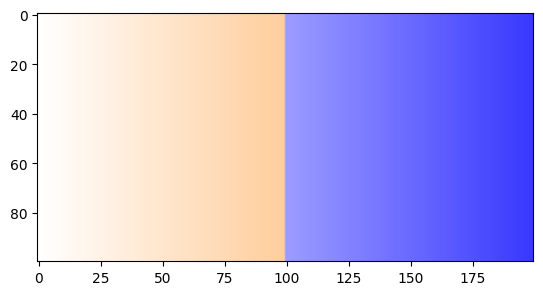

In [21]:
# Sir code


M5 = np.zeros([100,200,4], dtype=np.uint8)
M5[:, :100] = [255,128,0, 255]
M5[:, 100:] = [0,0,255,255]

for x in range(200):
    M5[:,x,3] = x #{:,:,3} refers to alpha channel

plt.imshow(M5)